### **Descripción del Tutorial: Visualización de Datos de ECG desde PhysioNet**

En este tutorial, aprenderás a acceder y visualizar datos de electrocardiogramas (ECG) desde la plataforma PhysioNet, una herramienta ampliamente utilizada en la investigación biomédica. Nos centraremos en el uso de la base de datos **MIT-BIH Arrhythmia Database**, que es una de las colecciones de datos más importantes para el estudio de arritmias cardíacas.

#### **Objetivos del Tutorial:**
- Introducir a los usuarios en el uso de la herramienta Physionet ATM para la selección y manipulación de datos ECG.
- Enseñar cómo seleccionar registros específicos de la base de datos MIT-BIH Arrhythmia.
- Mostrar cómo visualizar gráficamente las señales de ECG utilizando la opción "Plot Waveforms".
- Explicar el proceso de exportación de los datos de ECG en formato .mat para su análisis en herramientas como MATLAB o Python.

#### **Pasos del Tutorial:**
1. **Acceso a Physionet ATM:** 
   - Aaccede a la herramienta Physionet ATM a través del enlace proporcionado. Exploraremos cómo navegar por la plataforma y seleccionar la base de datos **MIT-BIH Arrhythmia**.

   https://archive.physionet.org/cgi-bin/atm/ATM

2. **Selección de Registros y Señales:**
   - Selecciona un registro específico, en este caso, el registro 100, que contiene datos de ECG de un paciente específico.
   - Posteriormente, escoge la señal V5, una derivación del ECG que será utilizada para la visualización.

3. **Visualización de Datos de ECG:**
   - Utiliza la herramienta "Plot Waveforms" para generar una gráfica visual de la señal ECG seleccionada. 

4. **Exportación de Datos:**
   - Exporta los datos de ECG en formato .mat utilizando la opción “Export signals as .mat”. El archivo .info es importante y se descarga junto con el .mat, estos archivos pueden ser utilizados en software de análisis como MATLAB o en entornos de desarrollo como Python.

5. **Introducción al Análisis en VS Code:**
   - Carga y analizar los datos exportados en VS Code (u otro editor) utilizando Python. El enfoque principal de este tutorial es en herramientas de código abierto.

#### **Requisitos Previos:**
- Conocimientos básicos de ECG y señales fisiológicas.
- Familiaridad con la plataforma PhysioNet.
- Experiencia básica en Python para el análisis de datos.

Este tutorial está diseñado para ser accesible tanto para principiantes como para aquellos con experiencia previa en el análisis de señales biomédicas. Al final del tutorial, los usuarios estarán capacitados para acceder, visualizar y exportar datos de ECG desde PhysioNet, preparándolos para un análisis más profundo utilizando herramientas de software.


# 01 Obtain Data

In [2]:
# import pyplot

import matplotlib.pyplot as plt
import numpy as np

# import loadmat

from scipy.io import loadmat


In [4]:
# load 100m.info. this file is a plain text file

info = open('100m.info').read()

# print the content of the info file

print(info)





Source: record mitdb/100
val has 1 row (signal) and 3600 columns (samples/signal)
Duration:     0:10
Sampling frequency: 360 Hz  Sampling interval: 0.002777777778 sec
Row	Signal	Gain	Base	Units
1	V5	200	0	mV

To convert from raw units to the physical units shown
above, call the 'rdmat.m' function from the wfdb-matlab
toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



## Observaciones

* La frecuencia de muestreo es 360 Hz
* Se tiene 10 segundos de señal
* Se tiene 3600 muestras
* La ganacia es de 200
* La base de tiempo es 0


In [8]:
# load 100m.mat 

data = loadmat('100m.mat')

## imprimir los campos de data

#print(data.keys())

ecg = data['val']

print(ecg)




[[-13 -13 -13 ... -59 -58 -57]]
[[-0.065 -0.065 -0.065 ... -0.295 -0.29  -0.285]]


# 02 DATA TRANFORMATION

* Normalizar la señal ecg para que quede entre -1 y +
* Tranformar el objeto ecg a un arreglo 1D

In [16]:
base=0
ganancia=200
ecg=(ecg-base)/ganancia # normalizar la señal ecg para que quede entre -1 y 1

print(ecg)



[[-0.000325 -0.000325 -0.000325 ... -0.001475 -0.00145  -0.001425]]


In [18]:
# tranform the ecg signal to a 1D numpy array

ecg = ecg.flatten()

print(ecg)


[-0.000325 -0.000325 -0.000325 ... -0.001475 -0.00145  -0.001425]


# 03 DATA EXPLORATION

In [13]:
# summary statistics for ecg

print('mean:', np.mean(ecg))
print('std:', np.std(ecg))
print('min:', np.min(ecg))
print('max:', np.max(ecg))

print('numero de muestras :',ecg.size)

mean: -0.2031736111111111
std: 0.12252240894022379
min: -0.47
max: 0.8
numero de muestras : 3600


# 04 Visualization

[0.00000000e+00 2.77777778e-03 5.55555556e-03 ... 9.99166667e+00
 9.99444444e+00 9.99722222e+00]
3600


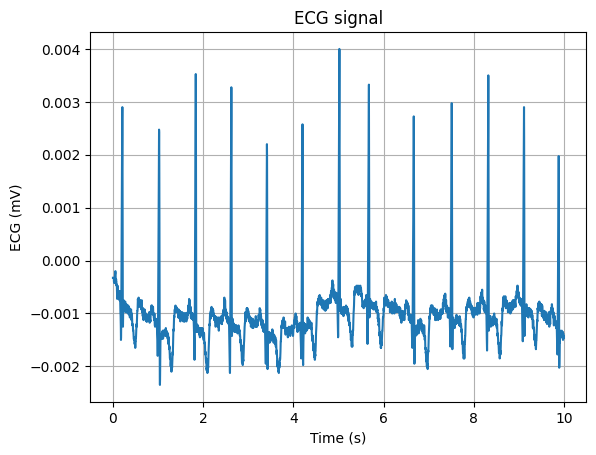

In [19]:
# crear un vector de tiempo para la señal ecg
# vector de tiempo tiene la misma cantidad de muestras que la señal ecg
fs = 360 # frecuencia de muestreo
t = np.arange(0, ecg.size/fs, 1/fs) # vector de tiempo
print(t)
print(t.size)

# flatten the ecg signal to a 1D array
# ecg = ecg.flatten()  # ya se hizo antes

# plot the ecg signal

plt.figure()
plt.plot(t, ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG signal')
plt.grid()
plt.show()




# Conclusiones

En este proyecto se cargo una señal ecg en formato mat, se normalizo la señal, se calculo el vector de tiempo y se grafico la señal ecg.

Se puede observar que la señal ecg tiene una frecuencia de muestreo de 360 Hz y una duracion de 10 segundos.

La señal ecg tiene una amplitud de -1 a 1 mV. esto se logro normalizando la señal.

### **Importancia del Proyecto**

La normalización y análisis de señales ECG son pasos fundamentales en la preparación de datos para aplicaciones médicas y de investigación. Al normalizar la señal ECG, se garantiza que todas las señales tengan un rango de amplitud uniforme, lo cual es crucial para la correcta interpretación y comparación de los datos. Este proceso permite que los algoritmos de detección de arritmias y otros análisis de señales cardíacas funcionen de manera más efectiva, al eliminar posibles variaciones debidas a diferencias en la amplitud de las señales originales.

Además, el cálculo del vector de tiempo y la correcta grafica de la señal ECG proporcionan una visualización clara de la actividad cardíaca, facilitando la identificación de patrones y características importantes, como picos y ondas, que son esenciales para el diagnóstico médico. En resumen, este proyecto no solo mejora la calidad de los datos para análisis posteriores, sino que también proporciona una base sólida para la implementación de técnicas avanzadas en la investigación y desarrollo de herramientas de diagnóstico cardiológico.